**Caution!**: For the code base please check: https://github.com/IremErturk/dtc-dbt-taxi-rides-ny

#### Question 1: 
**What is the count of records in the model fact_trips after running all models with the test run variable disabled and filtering for 2019 and 2020 data only (pickup datetime)** 

You'll need to have completed the "Build the first dbt models" video and have been able to run the models via the CLI. You should find the views and models for querying in your DWH.

**Prerequsite steps:**


0. [Optional] Just check the tables in trips_data_all schema (as these are our source for dbt )

```sql
-- Yellow Trip data counts 2019-2020
-- 109047518 (**)
SELECT COUNT(*) FROM `blissful-scout-339008.trips_data_all.yellow_tripdata`
```
```sql
-- Green Trip data counts 2019-2020
-- 7778101 (**)
SELECT COUNT(*) FROM `blissful-scout-339008.trips_data_all.green_tripdata`

```

1. Create required tables
```bash
dbt run --select stg_green_tripdata --var 'is_test_run: false' (6304783)
dbt run --select stg_yellow_tripdata --var 'is_test_run: false' (56100630)
dbt run --select fact_trips (61636712)
```

2. [Optional] Do some analysis on tables created by dbt

```sql
-- 56100630 (dublicates are pruned by vendorId and pickup_datetime)
SELECT COUNT(*) FROM `blissful-scout-339008.dbt_iertuerk.stg_yellow_tripdata`
```

```sql
-- 6304783 (dublicates are pruned by vendorId and pickup_datetime)
SELECT COUNT(*) FROM `blissful-scout-339008.dbt_iertuerk.stg_green_tripdata`
```

```sql
-- Fact Trip data counts 2019-2020 is 61636712
SELECT COUNT(*) FROM `blissful-scout-339008.dbt_iertuerk.fact_trips`
```


**Answer: 61635416**
```sql
SELECT
  COUNT(*)
FROM
  `blissful-scout-339008.dbt_iertuerk.fact_trips`
WHERE
  EXTRACT(YEAR
  FROM
    pickup_datetime) >= 2019
  AND EXTRACT(YEAR
  FROM
    pickup_datetime)<2021
```

#### Question 2: 
**What is the distribution between service type filtering by years 2019 and 2020 data as done in the videos**

You will need to complete "Visualising the data" videos, either using data studio or metabase. 


**Answer:** 89.9/10.1

In below you can see the report created by data studio for data in fact_trips

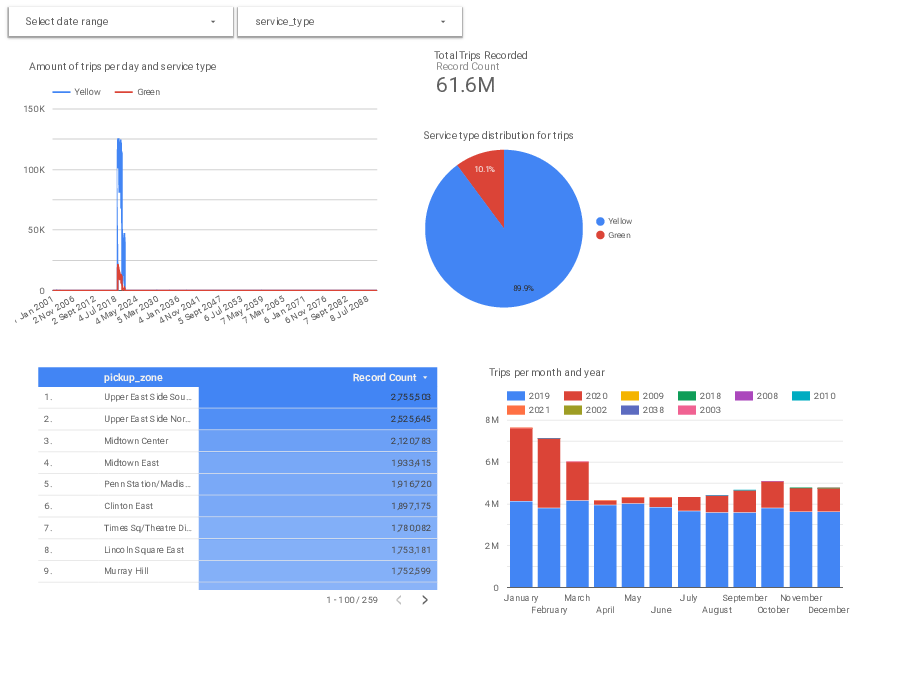

In [4]:
from wand.image import Image as WImage
img = WImage(filename='artifacts/fact_trips_2019-2020.pdf')
img

#### Question 3: 
**What is the count of records in the model stg_fhv_tripdata after running all models with the test run variable disabled (:false)**  

Create a staging model for the fhv data for 2019 and do not add a deduplication step. Run it via the CLI without limits (is_test_run: false).
Filter records with pickup time in year 2019.

**Prerequsite steps:**


0. [Optional] Just check the tables in trips_data_all schema (as these are our source for dbt )

```sql
-- 42084899
SELECT COUNT(*)  FROM `blissful-scout-339008.trips_data_all.external_fhv_tripdata_2019` 
```

1. Create required tables
```bash
dbt run --select stg_fhv_tripdata --var 'is_test_run: false'
```

2. [Optional] Do some analysis on tables created by dbt

```sql
-- 42084899
SELECT COUNT(*)  FROM `blissful-scout-339008.dbt_iertuerk.stg_fhv_tripdata`
```


**Answer:** 42084899

#### Question 4: 
**What is the count of records in the model fact_fhv_trips after running all dependencies with the test run variable disabled (:false)**  

Create a core model for the stg_fhv_tripdata joining with dim_zones.
Similar to what we've done in fact_trips, keep only records with known pickup and dropoff locations entries for pickup and dropoff locations. 
Run it via the CLI without limits (is_test_run: false) and filter records with pickup time in year 2019.

0. Create required tables
```bash
dbt run --select fact_fhv_trips 
```

1. [Optional] Do some analysis on tables created by dbt

```sql
-- 22676253
SELECT COUNT(*)  FROM `blissful-scout-339008.dbt_iertuerk.fact_fhv_trips`
```

**Answer:** 22676253

#### Question 5: 
**What is the month with the biggest amount of rides after building a tile for the fact_fhv_trips table**

Create a dashboard with some tiles that you find interesting to explore the data. One tile should show the amount of trips per month, as done in the videos for fact_trips, based on the fact_fhv_trips table.

**Answer:** 2019 January, as seen below analysis have a huge deviation

Here you can also check the trip distribution by months

```sql
SELECT
  EXTRACT(MONTH
  FROM
    pickup_datetime),
  COUNT(*) AS c
FROM
  `blissful-scout-339008.dbt_iertuerk.fact_fhv_trips`
GROUP BY
  EXTRACT(MONTH
  FROM
    pickup_datetime)
ORDER BY
  c DESC
```

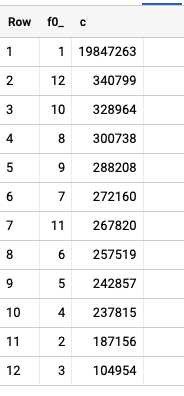

In [7]:
from wand.image import Image as WImage
img = WImage(filename='artifacts/fact_fhv_trips_month_distribution.png')
img

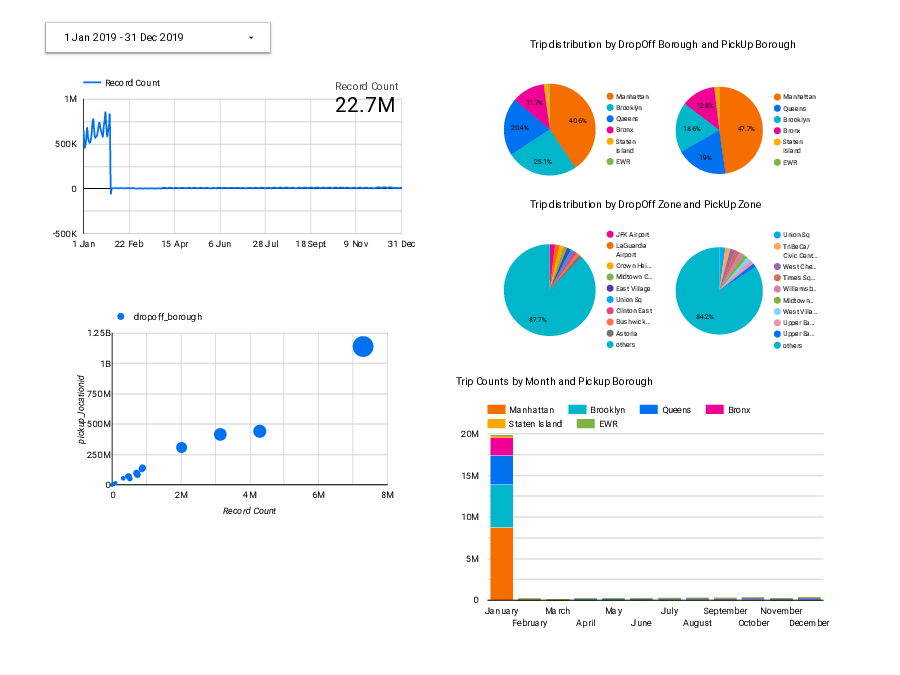

In [8]:
img = WImage(filename='artifacts/fact_fhv_trips_2019.pdf')
img